In [4]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [5]:
b, a = signal.bessel(N=5, Wn=2*np.pi*12, btype='lowpass', analog=True)

In [6]:
t = np.linspace(0, 1.25, 500, endpoint=False)

In [7]:
u = (np.cos(2*np.pi*4*t) + 0.6*np.sin(2*np.pi*40*t) + 0.5*np.cos(2*np.pi*80*t))

In [8]:
tout, yout, xout = signal.lsim((b, a), U=u, T=t)

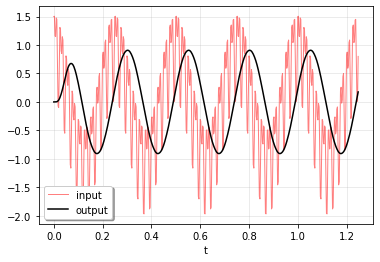

In [9]:
plt.plot(t, u, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(tout, yout, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

## impluse 冲击信号

In [10]:
system = ([1.0, 1], [7.0, 4.0, 6.0])
t, y = signal.impulse(system)

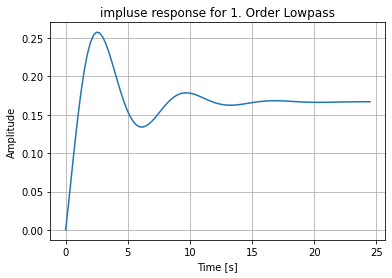

In [14]:
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('impluse response for 1. Order Lowpass')
plt.grid()

## step 阶跃信号

In [12]:
t, y = signal.step(system)

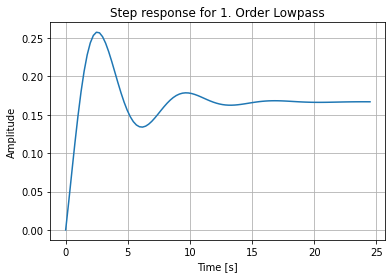

In [13]:
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

## 卷积

In [17]:
sig = np.repeat([0., 1., 0.], 100)
win = signal.windows.hann(50)
filtered = signal.convolve(sig, win, mode='same') / sum(win)

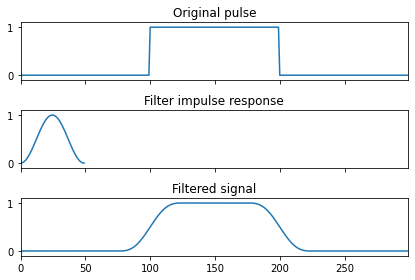

In [19]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.set_title('Original pulse')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()

# 零状态响应

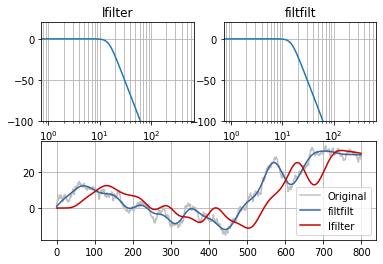

In [28]:
b, a = signal.butter(4, 0.03, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(b, a, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(b, a, signal.lfilter(b, a, impulse))

plt.subplot(2, 2, 1)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_lf))))
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('lfilter')

plt.subplot(2, 2, 2)
plt.semilogx(20*np.log10(np.abs(np.fft.rfft(imp_ff))))
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('filtfilt')

sig = np.cumsum(randn(800))  # Brownian noise
sig_ff = signal.filtfilt(b, a, sig)
sig_lf = signal.lfilter(b, a, signal.lfilter(b, a, sig))
plt.subplot(2, 1, 2)
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.plot(sig_lf, color='#cc0000', label='lfilter')
plt.grid(True, which='both')
plt.legend(loc="best")

In [27]:
from numpy.random import randn

In [31]:
system = ([1.0], [1.0, 3.0, 2.0])
t, y = signal.impulse2(system)
plt.stem(t, y)

ValueError: `system` needs to be an instance of `dlti` or have 2, 3 or 4 arguments.